In [3]:
# install mlxtend library
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 479.2 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 729.2 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 824.4 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 824.4 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 824.4 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 677.1 kB/s eta 0:00:00


In [5]:
#import necessary libraries
import pandas as pd 
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [9]:
# print the datafrsame 
titanic=pd.read_csv("Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


# observations:

- from the above data there is no null values in the data
- from the above that seprates gender and its seperates acording to age
- class gender servived thy are object datatype and catagorical data type
- there are no missing values
- all columns are object data type and categorical in nature
- as the columns are categorical, we can adopt one-hot-encoding

<BarContainer object of 4 artists>

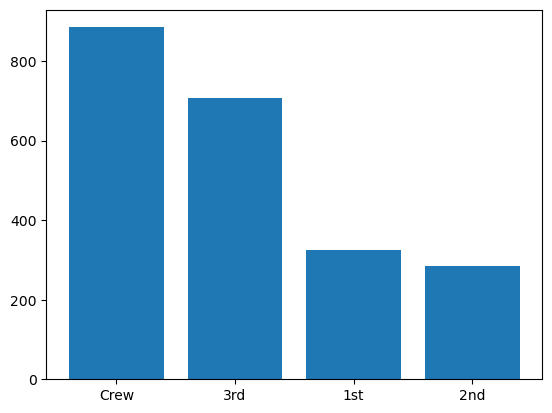

In [27]:
#plot a bar chart to visiualize the category of people on the ship
counts=titanic['Class'].value_counts()
plt.bar(counts.index, counts.values)

# observation

In [ ]:
- 

<BarContainer object of 2 artists>

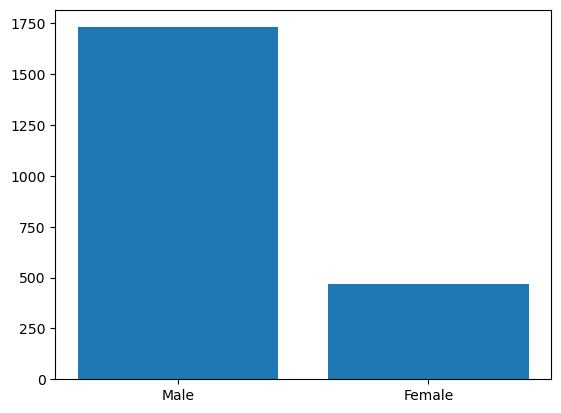

In [39]:
counts=titanic['Gender'].value_counts()
plt.bar(counts.index, counts.values)

In [41]:
# perform onehot encoding on categorical columns
df=pd.get_dummies(titanic,dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


# apriori alogorithm

In [50]:
# apply apriori alogorithm to get itemset combinations
frequent_itemsets=apriori(df, min_support=0.05,use_colnames=True,max_len=None)
frequent_itemsets

C:\Users\chean\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Age_Adult, Gender_Male, Survived_No, Class_1st)"
59,0.069968,"(Class_2nd, Gender_Male, Age_Adult, Survived_No)"
60,0.175829,"(Age_Adult, Gender_Male, Class_3rd, Survived_No)"
61,0.304407,"(Gender_Male, Class_Crew, Age_Adult, Survived_No)"


In [52]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   63 non-null     float64
 1   itemsets  63 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [56]:
#generate association rules with metrics
rules=association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,1.0,0.034348,1.232615,0.662941,0.223077,0.188716,0.377332
1,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,1.0,0.034348,1.419998,0.611701,0.223077,0.295774,0.377332
2,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
3,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
4,(Survived_Yes),(Class_1st),0.323035,0.147660,0.092231,0.285513,1.933584,1.0,0.044531,1.192940,0.713221,0.243697,0.161735,0.455064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"(Age_Adult, Class_Crew)","(Gender_Male, Survived_Yes)",0.402090,0.166742,0.087233,0.216949,1.301104,1.0,0.020188,1.064117,0.387051,0.181132,0.060254,0.370055
160,"(Class_Crew, Survived_Yes)","(Age_Adult, Gender_Male)",0.096320,0.757383,0.087233,0.905660,1.195776,1.0,0.014282,2.571740,0.181174,0.113811,0.611158,0.510419
161,(Gender_Male),"(Age_Adult, Class_Crew, Survived_Yes)",0.786461,0.096320,0.087233,0.110919,1.151565,1.0,0.011481,1.016420,0.616356,0.109652,0.016155,0.508289
162,(Class_Crew),"(Age_Adult, Gender_Male, Survived_Yes)",0.402090,0.153567,0.087233,0.216949,1.412737,1.0,0.025486,1.080943,0.488626,0.186227,0.074882,0.392498


In [66]:
rules.sort_values(by='lift', ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
120,"(Gender_Male, Class_1st)","(Age_Adult, Survived_No)",0.081781,0.653339,0.053612,0.655556,1.003392,1.0,0.000181,1.006434,0.003682,0.078667,0.006393,0.368807
119,"(Age_Adult, Survived_No)","(Gender_Male, Class_1st)",0.653339,0.081781,0.053612,0.082058,1.003392,1.0,0.000181,1.000302,0.009752,0.078667,0.000302,0.368807
20,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,1.0,0.009870,1.051116,0.263149,0.773191,0.048630,0.879936
21,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,1.0,0.009870,1.339441,0.061028,0.773191,0.253420,0.879936
24,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,(Gender_Female),"(Survived_Yes, Class_1st)",0.213539,0.092231,0.064062,0.300000,3.252709,1.0,0.044367,1.296813,0.880609,0.265038,0.228879,0.497291
105,"(Age_Adult, Survived_Yes, Class_1st)",(Gender_Female),0.089505,0.213539,0.063607,0.710660,3.328005,1.0,0.044495,2.718119,0.768285,0.265655,0.632098,0.504266
112,(Gender_Female),"(Age_Adult, Survived_Yes, Class_1st)",0.213539,0.089505,0.063607,0.297872,3.328005,1.0,0.044495,1.296766,0.889453,0.265655,0.228851,0.504266
106,"(Gender_Female, Age_Adult)","(Survived_Yes, Class_1st)",0.193094,0.092231,0.063607,0.329412,3.571602,1.0,0.045798,1.353691,0.892314,0.286885,0.261279,0.509533


In [68]:
# rules[rules[{'Gender_Male','Age_Adult')"]]

In [ ]:
import matplotlib.pyplot as pl